In [27]:
import os,shutil
import numpy as np

In [47]:

from keras import models
from keras import layers

In [2]:
print(os.getcwd())

C:\Users\DELL


In [19]:
total =len(os.listdir("caltech-original-prepared\\train"))
print(total)
folderlist = os.listdir("caltech-original-prepared\\train")
dst = "caltech-original-prepared\\val"
## create all the classess in validation folder
for folder in folderlist:
    dst = "caltech-original-prepared\\val"
    dst = os.path.join(dst,folder)
    if (not(os.path.exists(dst))):
        os.mkdir(dst)

101


In [43]:
# transfer 50% images of train to validation
for f in folderlist:
    src = "caltech-original-prepared\\train"
    src = os.path.join(src , f)
    total = len(os.listdir(src))
    half = int(total/2)
    dst = src.replace("train","val")
    imagelist = os.listdir(src)
    for i in range(half):
        src = "caltech-original-prepared\\train"
        src = os.path.join(src , f)
        src = os.path.join(src , imagelist[i])
        dst = src.replace("train","val")
        shutil.copyfile(src,dst)
print("copied")

copied


In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='sigmoid'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [60]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [61]:
train_dir = r"C:\Users\DELL\caltech-original-prepared\train"
validation_dir = r"C:\Users\DELL\caltech-original-prepared\val"

In [63]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 7374 images belonging to 101 classes.
Found 1303 images belonging to 101 classes.


In [67]:
from PIL import Image
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 41s 405ms/step - loss: nan - acc: 0.0545 - val_loss: nan - val_acc: 0.0437
Epoch 2/15
100/100 [==============================] - 84s 844ms/step - loss: nan - acc: 0.0470 - val_loss: nan - val_acc: 0.0488
Epoch 3/15
100/100 [==============================] - 87s 866ms/step - loss: nan - acc: 0.0520 - val_loss: nan - val_acc: 0.0498
Epoch 4/15
100/100 [==============================] - 86s 857ms/step - loss: nan - acc: 0.0454 - val_loss: nan - val_acc: 0.0560
Epoch 5/15
100/100 [==============================] - 94s 942ms/step - loss: nan - acc: 0.0485 - val_loss: nan - val_acc: 0.0529
Epoch 6/15
100/100 [==============================] - 92s 919ms/step - loss: nan - acc: 0.0555 - val_loss: nan - val_acc: 0.0407
Epoch 7/15
100/100 [==============================] - 95s 947ms/step - loss: nan - acc: 0.0495 - val_loss: nan - val_acc: 0.0580
Epoch 8/15
100/100 [==============================] - 93s 932ms/step - loss: nan - acc: 0.0515 - 

In [68]:
model.save('caltech-original-prepared/CaltechModel.h5')

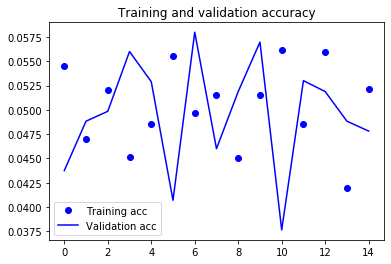

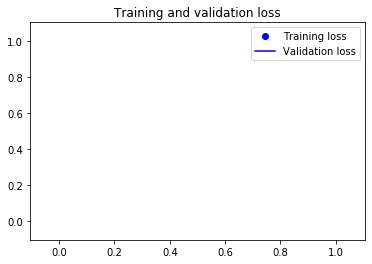

In [70]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()